In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv' , low_memory=False)

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562 entries, 0 to 10561
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10562 non-null  int64  
 1   NAME                            10498 non-null  object 
 2   host id                         10562 non-null  int64  
 3   host_identity_verified          10467 non-null  object 
 4   host name                       10534 non-null  object 
 5   neighbourhood group             10535 non-null  object 
 6   neighbourhood                   10546 non-null  object 
 7   lat                             10554 non-null  float64
 8   long                            10554 non-null  float64
 9   country                         10512 non-null  object 
 10  country code                    10483 non-null  object 
 11  instant_bookable                10483 non-null  object 
 12  cancellation_policy             

In [ ]:
df.duplicated().value_counts()

,count
False,10562


In [ ]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'] , axis=1 , inplace=True)

In [ ]:
df['price'] = df['price'].str.replace('$','', regex = False)
df['service fee'] = df['service fee'].str.replace('$','',regex = False)

In [ ]:
df['price'] = df['price'].str.replace(',','', regex = False)
df['service fee'] = df['service fee'].str.replace(',','',regex = False)

In [ ]:
df.rename(columns = {
    'price' : 'price_$',
    'service fee' : 'service_fee_$'
}, inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)

In [ ]:
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)

In [ ]:
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

/tmp/ipython-input-3835354647.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [ ]:
df.loc[df['neighbourhood group'] == 'brookln' , 'neighbourhood group'] = 'Brooklyn'

In [ ]:
df = df.drop(df[df['availability 365'] > 500 ].index)

In [ ]:
df.duplicated().value_counts()

,count
False,8530


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8530 entries, 0 to 10561
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8530 non-null   object        
 1   NAME                            8530 non-null   object        
 2   host id                         8530 non-null   object        
 3   host_identity_verified          8530 non-null   object        
 4   host name                       8530 non-null   object        
 5   neighbourhood group             8530 non-null   object        
 6   neighbourhood                   8530 non-null   object        
 7   lat                             8530 non-null   float64       
 8   long                            8530 non-null   float64       
 9   country                         8530 non-null   object        
 10  country code                    8530 non-null   object        
 11  instant_

In [ ]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8530.000000,8530.000000,8530.000000,8530.000000,8530.000000,8530.000000,8530.000000,8530,8530.000000,8530.000000,8530.000000,8530.000000
mean,40.728594,-73.958123,2012.435756,621.281477,124.259789,7.897655,49.356155,2018-03-13 12:34:46.565064448,0.870107,3.010082,2.712309,208.519343
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687990,-73.983370,2008.000000,324.000000,65.000000,2.000000,5.000000,2016-10-22 00:00:00,0.110000,2.000000,1.000000,99.000000
50%,40.721575,-73.958410,2012.000000,620.000000,124.000000,3.000000,18.000000,2019-01-03 00:00:00,0.350000,3.000000,1.000000,210.000000
75%,40.763757,-73.942193,2017.000000,913.000000,183.000000,5.000000,66.000000,2019-06-17 00:00:00,1.180000,4.000000,2.000000,317.750000
max,40.908040,-73.729010,2022.000000,1200.000000,240.000000,1250.000000,607.000000,2022-05-21 00:00:00,13.450000,5.000000,121.000000,426.000000
std,0.052633,0.036591,5.761969,336.847678,67.375548,25.732153,68.944811,NaN,1.172126,1.423186,7.066424,125.842370


In [ ]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,5023
Private room,3399
Shared room,108


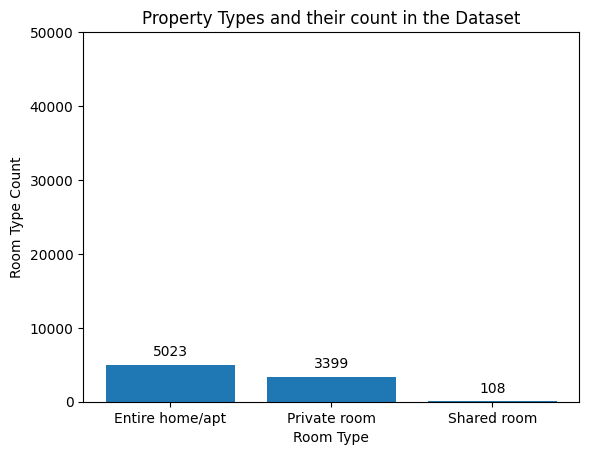

In [ ]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [ ]:
hood_group  = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,3868
Manhattan,3837
Queens,669
Bronx,118
Staten Island,38


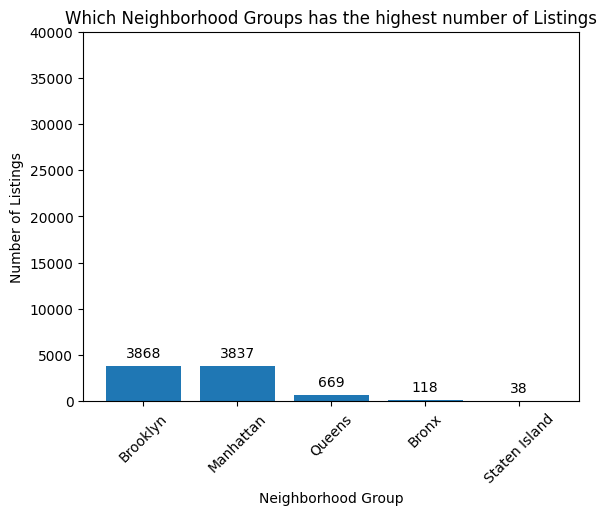

In [ ]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

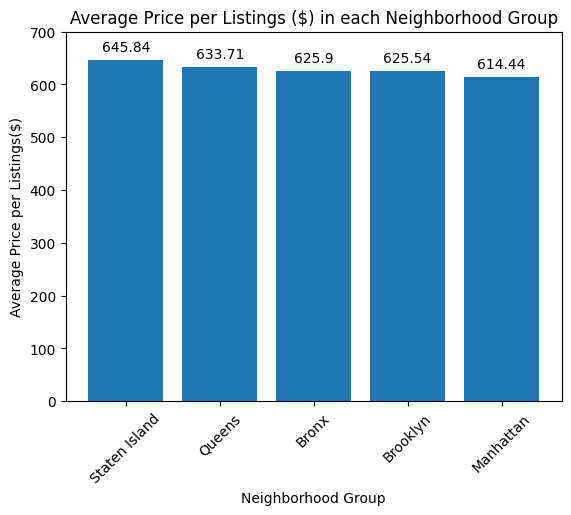

In [ ]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"],2), label_type = 'edge' , padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

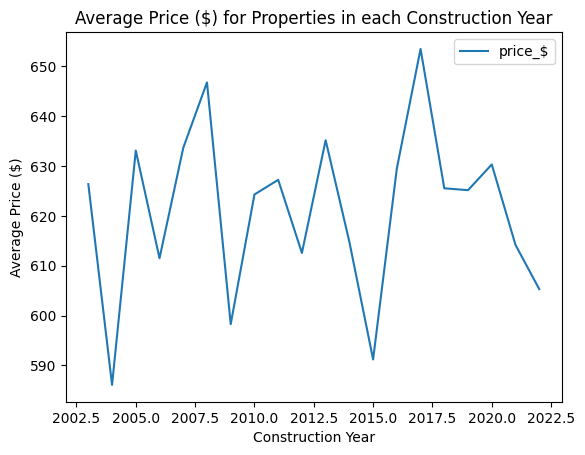

In [ ]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

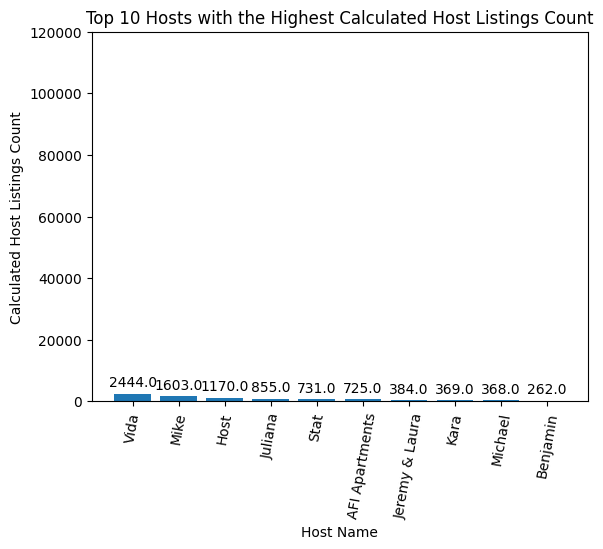

In [ ]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"], label_type = 'edge' , padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts with the Highest Calculated Host Listings Count');

In [ ]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.010818
unconfirmed,3.009350


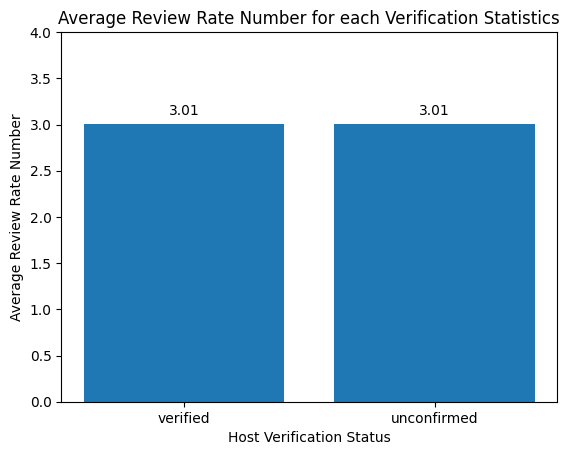

In [ ]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"],2) ,padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Verification Statistics');

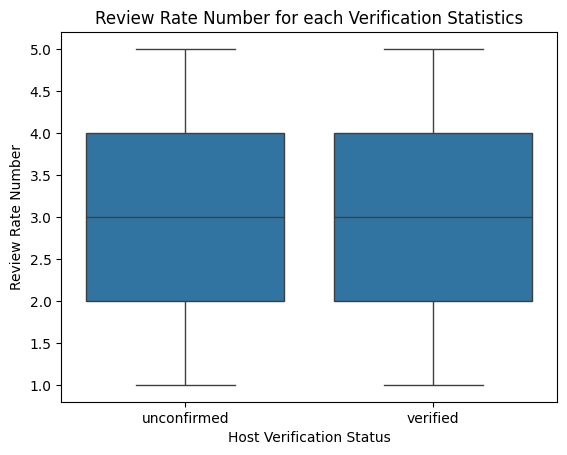

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified" , y = "review rate number" , color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Review Rate Number for each Verification Statistics');

In [ ]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999913132990005)

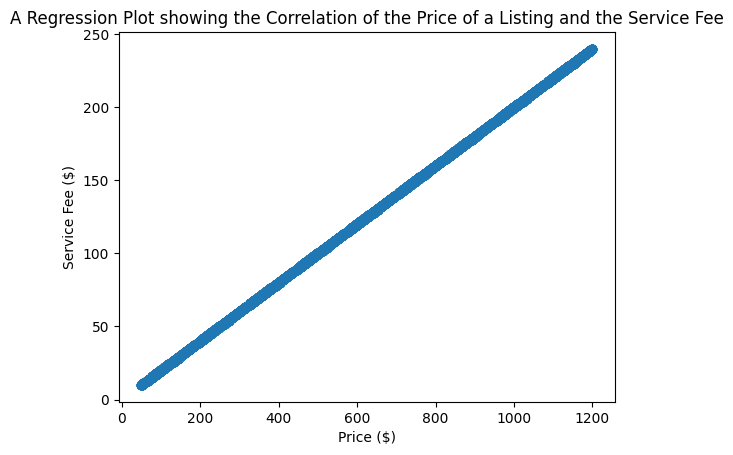

In [ ]:
sns.regplot(df , x = 'price_$' , y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and the Service Fee');

In [ ]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.871795
                    Private room               2.973333
                    Shared room                2.000000
Brooklyn            Entire home/apt            2.975861
                    Private room               3.084428
                    Shared room                2.718750
Manhattan           Entire home/apt            3.026359
                    Private room               2.999259
                    Shared room                3.066667
Queens              Entire home/apt            2.849498
                    Private room               3.011173
                    Shared room                3.500000
Staten Island       Entire home/apt            3.050000
                    Private room               2.555556

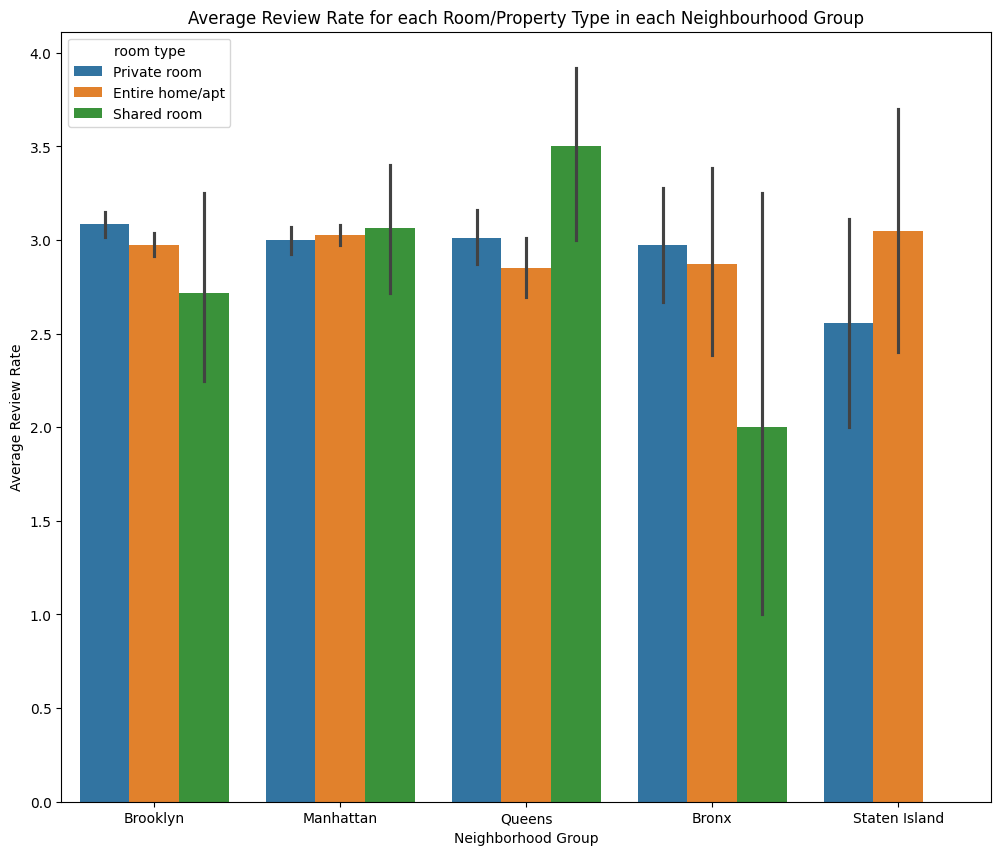

In [ ]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df , x = 'neighbourhood group' , y = 'review rate number' , hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host Listings Count and the Price of a Listing')

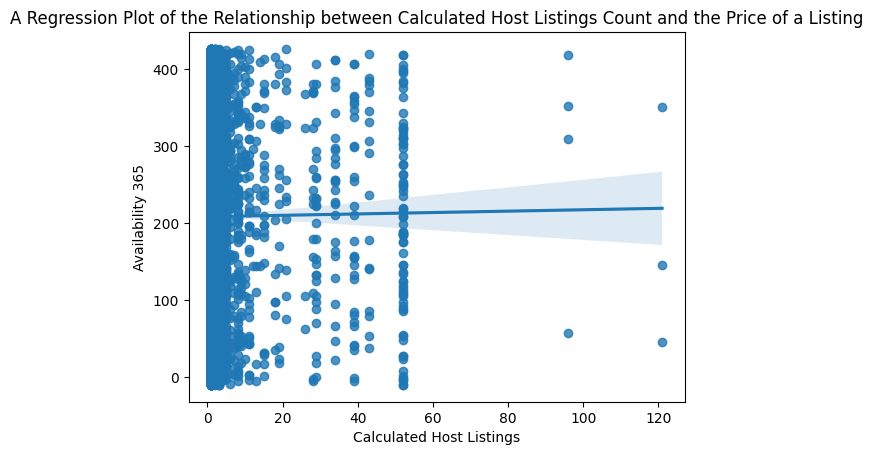

In [ ]:
sns.regplot(df, x = 'calculated host listings count' , y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and the Price of a Listing')

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.005070297461535828)